In [1]:
import pandas as pd
from os import listdir
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [2]:

dir = listdir("C:/Users/Thiago/Documents/GitHub/TCC-Previsor_viagens_onibus/Final/TratamentoFloripa")

dir.remove('tratamento_floripa.ipynb')

df2 = pd.DataFrame([])
for file in dir:
    mes = pd.read_excel(file)
    print(len(mes.index))
    df2 = pd.concat([df2,mes])

223402
233772
209239
230499
237584
204593
232717
220745
220367
243402
221609


In [80]:
df = df2.copy()
df.drop(df.loc[df['Linha'].isin(['608','606','310','7220'])].index,inplace=True)

In [81]:
df.loc[df['Linha'].isin(['608','606','310','7220'])]

,DataIni,HoraIni,DataFim,HoraFim,Sentido,Linha,NoVeículo,DuraçãoViagem,TotalGiros,KmPerc


In [82]:
# Função para converter o tempo em segundos
def time_to_seconds(time_str):
    timedelta_obj = dt.timedelta(hours=time_str.hour, minutes=time_str.minute, seconds=time_str.second)
    return timedelta_obj.total_seconds()

# Aplicar a função à coluna 'Time' e criar uma nova coluna 'Seconds'
df['Segundos'] = df['DuraçãoViagem'].apply(time_to_seconds)
df.drop(df.loc[df["Segundos"] == 0].index,inplace=True)

In [83]:
linhas = df['Linha'].unique()

In [84]:
def outlier_metric(valores):
    Q1 = np.percentile(valores,25)
    Q3 = np.percentile(valores,75)
    intervalo = Q3-Q1
    limite_superior = Q3+intervalo*1.5
    limite_inferior = Q1-intervalo*1.5
    return limite_superior,limite_inferior

In [85]:
aux_list = []
for linha in linhas:
    rota = df.loc[df['Linha'] == linha]
    limite_superior,limite_inferior = outlier_metric(rota['Segundos'])
    rota = rota.loc[(rota['Segundos'] < limite_superior) & (rota['Segundos'] > limite_inferior)]
    aux = {
        'linha': linha,
        'desvio':rota['Segundos'].std(),
        'tamanho': len(rota)
    }
    aux_list.append(aux)

In [86]:
df3 = pd.DataFrame(aux_list)
df3.drop(df3.loc[df3['tamanho']<8000].index,inplace=True)
df3 = df3.sort_values('desvio').reset_index()
df3

,index,linha,desvio,tamanho
0,70,270,163.840931,13505
1,75,277,189.543764,14278
2,71,271,198.916177,10555
3,30,169,205.986173,12365
4,72,272,211.250899,14534
...,...,...,...,...
85,178,137,744.435672,11715
86,197,M233,778.943588,35571
87,23,136,785.559007,11151
88,22,135,810.399772,10909


In [94]:
rota = df.loc[df['Linha'] == '138']
limite_superior,limite_inferior = outlier_metric(rota['Segundos'])
#rota = rota.loc[(rota['Segundos'] < limite_superior) & (rota['Segundos'] > limite_inferior)]
rota.sort_values(by='Segundos')


,DataIni,HoraIni,DataFim,HoraFim,Sentido,Linha,NoVeículo,DuraçãoViagem,TotalGiros,KmPerc,Segundos
222404,2019-07-05,17:20:00,2019-07-05,17:21:00,Volta,138,0285,00:01:00,0,16.708,60.0
191746,2019-06-24,19:46:00,2019-06-24,19:47:00,Volta,138,5125,00:01:00,0,16.708,60.0
227197,2019-10-04,07:37:00,2019-10-04,07:38:00,Volta,138,258,00:01:00,0,16.708,60.0
226189,2019-10-26,12:52:00,2019-10-26,12:53:00,Volta,138,307,00:01:00,0,16.708,60.0
191586,2019-06-27,18:19:00,2019-06-27,18:20:00,Volta,138,50327,00:01:00,0,16.708,60.0
...,...,...,...,...,...,...,...,...,...,...,...
206892,2018-11-19,06:53:00,2018-11-19,10:25:00,Volta,138,45178,03:32:00,178,16.708,12720.0
206604,2019-03-13,17:14:00,2019-03-13,20:55:00,Volta,138,50335,03:41:00,91,16.708,13260.0
226314,2019-10-24,17:03:00,2019-10-24,20:49:00,Volta,138,50335,03:46:00,88,16.708,13560.0
26848,2019-02-11,20:37:00,2019-02-12,01:50:00,Volta,138,50368,05:13:00,31,16.708,18780.0


{'whiskers': [<matplotlib.lines.Line2D at 0x22617e291b0>,
 'caps': [<matplotlib.lines.Line2D at 0x22617e296f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22617e28f10>],
 'medians': [<matplotlib.lines.Line2D at 0x22617e29c30>],
 'fliers': [<matplotlib.lines.Line2D at 0x22617e29ed0>],
 'means': []}

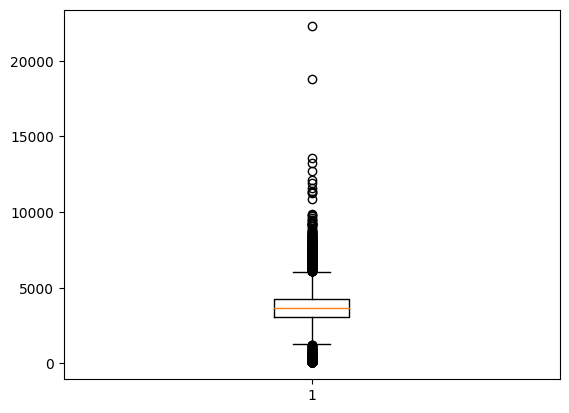

In [88]:
plt.boxplot(rota['Segundos'])

C:\Users\Thiago\AppData\Local\Temp\ipykernel_12904\4244547313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rota['DataInicio'] = rota.apply(lambda x: dt.datetime.combine(x['DataIni'],x['HoraIni']),axis=1)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_12904\4244547313.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rota["DataInicio"] = pd.to_datetime(rota["DataInicio"])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is

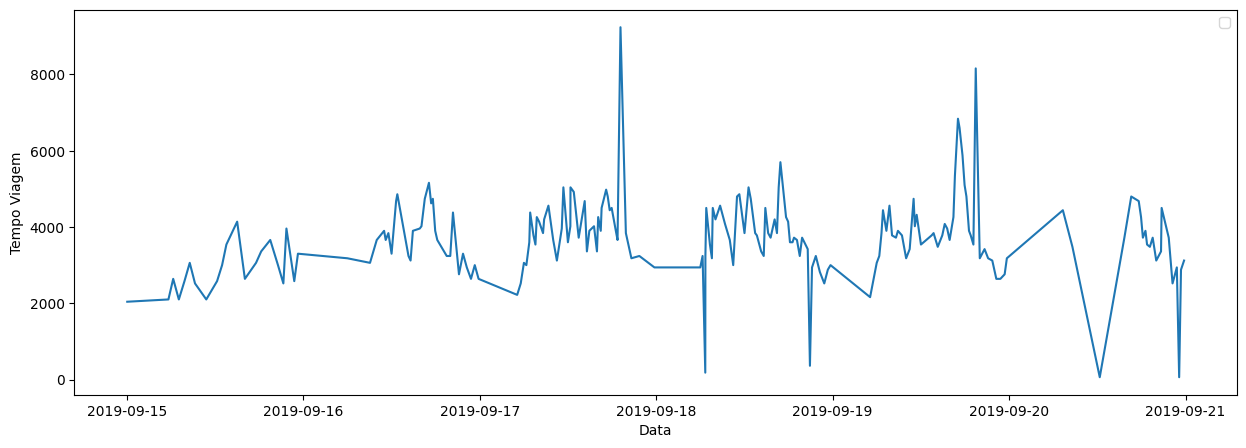

In [89]:
rota['DataInicio'] = rota.apply(lambda x: dt.datetime.combine(x['DataIni'],x['HoraIni']),axis=1)

rota["DataInicio"] = pd.to_datetime(rota["DataInicio"])
rota = rota.sort_values(by=["DataInicio"], ascending=False)

plt.figure(figsize=(15, 5))

plt.xlabel("Data")
plt.ylabel("Tempo Viagem")

rota = rota[(rota["DataInicio"] > "2019-09-15") & (rota["DataInicio"] < "2019-09-21")]


plt.plot(rota["DataInicio"], rota["Segundos"], color="#1f77b4")


plt.legend()
plt.show()

In [90]:
rota[(rota["DataIni"] == "2019-09-16")]

,DataIni,HoraIni,DataFim,HoraFim,Sentido,Linha,NoVeículo,DuraçãoViagem,TotalGiros,KmPerc,Segundos,DataInicio
207624,2019-09-16,23:51:00,2019-09-17,00:35:00,Volta,138,0312,00:44:00,3,16.708,2640.0,2019-09-16 23:51:00
207623,2019-09-16,23:20:00,2019-09-17,00:10:00,Volta,138,50364,00:50:00,6,16.708,3000.0,2019-09-16 23:20:00
207622,2019-09-16,22:49:00,2019-09-16,23:33:00,Volta,138,50333,00:44:00,11,16.708,2640.0,2019-09-16 22:49:00
207621,2019-09-16,22:15:00,2019-09-16,23:04:00,Volta,138,0281,00:49:00,28,16.708,2940.0,2019-09-16 22:15:00
207620,2019-09-16,21:44:00,2019-09-16,22:39:00,Volta,138,0295,00:55:00,60,16.708,3300.0,2019-09-16 21:44:00
207619,2019-09-16,21:11:00,2019-09-16,21:57:00,Volta,138,0296,00:46:00,30,16.708,2760.0,2019-09-16 21:11:00
207618,2019-09-16,20:22:00,2019-09-16,21:35:00,Volta,138,50364,01:13:00,33,16.708,4380.0,2019-09-16 20:22:00
207617,2019-09-16,20:00:00,2019-09-16,20:54:00,Volta,138,50346,00:54:00,51,16.708,3240.0,2019-09-16 20:00:00
207616,2019-09-16,19:31:00,2019-09-16,20:25:00,Volta,138,50333,00:54:00,42,16.708,3240.0,2019-09-16 19:31:00
207612,2019-09-16,18:14:00,2019-09-16,19:15:00,Volta,138,50362,01:01:00,36,16.708,3660.0,2019-09-16 18:14:00


In [91]:
def outlier_metric2(valores):
    Q1 = np.percentile(valores,25)
    Q3 = np.percentile(valores,75)
    intervalo = Q3-Q1
    limite_superior = Q3+intervalo*1.5
    limite_inferior = Q1-intervalo*1.5
    return Q1,Q3,intervalo,limite_superior,limite_inferior
v = outlier_metric2(rota['Segundos'])
v


(3180.0, 4200.0, 1020.0, 5730.0, 1650.0)

In [92]:
rota.loc[rota['Segundos']>1320]

,DataIni,HoraIni,DataFim,HoraFim,Sentido,Linha,NoVeículo,DuraçãoViagem,TotalGiros,KmPerc,Segundos,DataInicio
207415,2019-09-20,23:48:00,2019-09-21,00:40:00,Volta,138,0316,00:52:00,12,16.708,3120.0,2019-09-20 23:48:00
207414,2019-09-20,23:23:00,2019-09-21,00:11:00,Volta,138,50364,00:48:00,15,16.708,2880.0,2019-09-20 23:23:00
207412,2019-09-20,22:49:00,2019-09-20,23:38:00,Volta,138,50333,00:49:00,21,16.708,2940.0,2019-09-20 22:49:00
207411,2019-09-20,22:14:00,2019-09-20,22:56:00,Volta,138,50346,00:42:00,12,16.708,2520.0,2019-09-20 22:14:00
207409,2019-09-20,21:43:00,2019-09-20,22:45:00,Volta,138,0297,01:02:00,49,16.708,3720.0,2019-09-20 21:43:00
...,...,...,...,...,...,...,...,...,...,...,...,...
207628,2019-09-15,07:51:00,2019-09-15,08:34:00,Volta,138,4418,00:43:00,9,16.708,2580.0,2019-09-15 07:51:00
207627,2019-09-15,07:05:00,2019-09-15,07:40:00,Volta,138,0298,00:35:00,29,16.708,2100.0,2019-09-15 07:05:00
207625,2019-09-15,06:19:00,2019-09-15,07:03:00,Volta,138,50340,00:44:00,39,16.708,2640.0,2019-09-15 06:19:00
207626,2019-09-15,05:40:00,2019-09-15,06:15:00,Volta,138,0289,00:35:00,13,16.708,2100.0,2019-09-15 05:40:00


In [93]:
rota['Segundos'].mean()

3698.507462686567